<div style="border:solid green 2px; padding: 20px">
    
<b>Ольга, привет!</b> Мы рады тебя видеть на территории код-ревьюеров 😎. Ты проделала большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать дата-специалистом.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У нас с тобой 6 попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


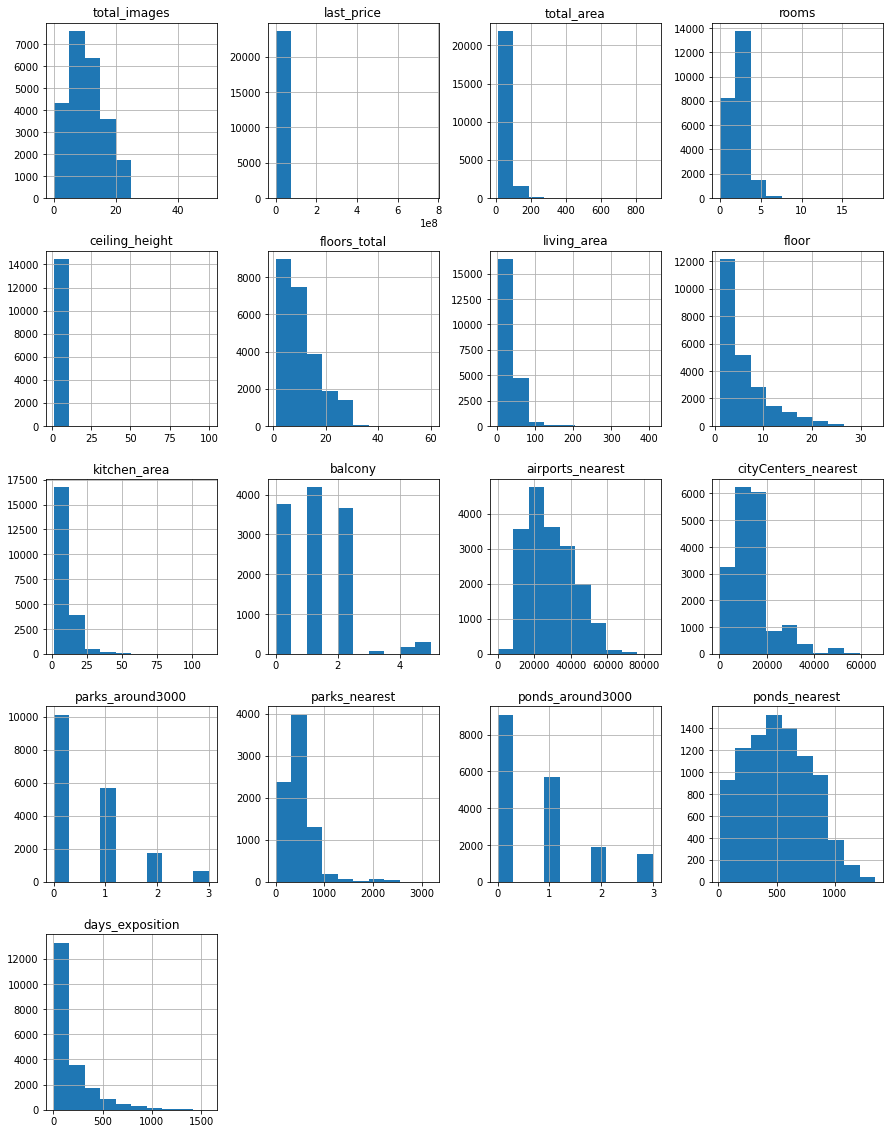

In [5]:
data.hist(figsize=(15,20))
plt.show()

По предварительному просмотру данных, у нас есть таблица из 22 столбцов и 23698 строк, заполненая разными типами данных и в некоторых имеются пропуски.

### Предобработка данных

Для начала определим столбцы, где есть пропуски

In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Рассмотри превый столбец, в котором есть пропуски, это столбец с данными о высоте потолков.

In [8]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Есть значения больше 25, посчитаем, что при заполнении перепутали точку местами, вернем ее на место.

In [9]:
def new_height(row):
    try:
        if row['ceiling_height'] >= 25:
            new = row['ceiling_height']/10
            return new
        else:
            return row['ceiling_height']
    except:
        return row['ceiling_height']

In [10]:
data['ceiling_height'] = data.apply(new_height, axis=1)

In [11]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46, 24.  ,  3.47,  3.33,
        3.63,  3.32,

Заполним пропуски медианным значением, так как имеются аномально маленькие и большие числа, которые могут повлиять на среднее значение.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [13]:
data['ceiling_height'].isnull().sum()

0

По ГОСТу в СПб и прилегающих районах потолки в жилых помещениях не должны быть ниже 2.5 метров, поэтому все значения ниже будем считать аномальными. И также данные больше 5 метров.

In [14]:
data[(data['ceiling_height'] > 5) | (data['ceiling_height'] < 2.5)]['ceiling_height'].count()

90

Аномальных данных не так много от общего количества, их удаление не повлияет на данные.

In [15]:
data = data.query('ceiling_height < 5 and ceiling_height >= 2.5')
len(data)

23608

Рассмотрим следующий столбец с пропусками, это данные о количестве этажей во всем доме. 
Пропуски заполним медианным значением по квартирам, находящихся на таком же этаже.

In [16]:
for elem in data['floor'].unique():
    data.loc[(data['floors_total'].isna()) & (data['floor'] == elem), 'floors_total'] = data.loc[data['floor'] == elem, 'floors_total'].mean()
data['floors_total'].isna().sum()

0

In [17]:
data['floors_total'].unique()

array([16.        , 11.        ,  5.        , 14.        , 12.        ,
       26.        , 24.        , 27.        ,  9.        ,  6.        ,
       17.        , 25.        ,  3.        , 23.        , 19.        ,
       18.        ,  4.        , 22.        ,  8.        ,  2.        ,
       10.        ,  7.        , 13.        , 15.        ,  8.00071839,
        6.89061422, 20.        , 28.        , 36.        , 21.        ,
       17.16570328, 12.68253968, 35.        , 34.        , 13.03073967,
       60.        , 24.36607143, 19.15339233, 11.61317829,  1.        ,
       29.        , 12.30024814,  8.00261097, 22.05142857, 18.34308511,
       25.03278689, 24.23140496, 16.91682785,  7.48447761,  8.33653846,
       22.875     , 23.64814815, 18.54654655, 33.        , 21.47787611,
       25.03030303, 15.77923977, 52.        ])

В СПб нет жилых домов выше 36 этажей, посчитаем эти данные аномальными.

In [18]:
data[data['floors_total'] > 36]['floors_total'].count()

2

In [19]:
data = data[data['floors_total'] < 37 ]
data['floors_total'].unique()

array([16.        , 11.        ,  5.        , 14.        , 12.        ,
       26.        , 24.        , 27.        ,  9.        ,  6.        ,
       17.        , 25.        ,  3.        , 23.        , 19.        ,
       18.        ,  4.        , 22.        ,  8.        ,  2.        ,
       10.        ,  7.        , 13.        , 15.        ,  8.00071839,
        6.89061422, 20.        , 28.        , 36.        , 21.        ,
       17.16570328, 12.68253968, 35.        , 34.        , 13.03073967,
       24.36607143, 19.15339233, 11.61317829,  1.        , 29.        ,
       12.30024814,  8.00261097, 22.05142857, 18.34308511, 25.03278689,
       24.23140496, 16.91682785,  7.48447761,  8.33653846, 22.875     ,
       23.64814815, 18.54654655, 33.        , 21.47787611, 25.03030303,
       15.77923977])

In [20]:
len(data)

23606

Рассмотрим столбец с жилой площадью. <br>Проверим есть ли зависимость между количеством комнат и жилой площадью.

<AxesSubplot:xlabel='living_area', ylabel='rooms'>

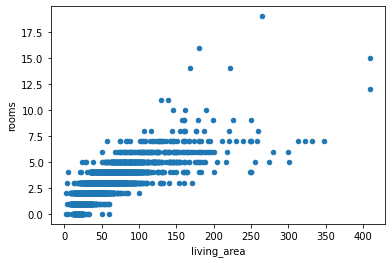

In [21]:
data.plot.scatter(x='living_area', y='rooms')

In [22]:
data['living_area'].corr(data['rooms'])

0.8465814128853121

Зависимость есть, поэтому заменим пропуски в жилой площади медианными значениями квартир с соответсвующим количеством комнат.

In [23]:
for elem in data['rooms'].unique():
    data.loc[(data['rooms'] == elem) & (data['living_area'].isna()), 'living_area'] = data.loc[(data['rooms'] == elem), 'living_area'].median()
data['living_area'].isna().sum()

0

Значения меньше 10 м посчитаем аномальными.

In [24]:
data[data['living_area'] < 10]['living_area'].count()

25

Таких данных мало, поэтому удалим их.

In [25]:
data = data.query('living_area >= 10')
len(data)

23581

In [26]:
warnings.filterwarnings('ignore')

In [27]:
data['is_apartment'].isnull().sum()

20822

In [28]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [29]:
data['is_apartment'].unique()

array([False,  True])

In [30]:
data['is_apartment'].isnull().sum()

0

Рассмотрим столбец с площадью кухни

In [31]:
data['kitchen_area'].corr(data['total_area'])

0.6097463589554817

Так как есть небольшая зависимость между общей площадью и площадью кухни, заполним пропуски медианными значениями с соответствующим типом общей площади.

In [32]:
data['total_area'].describe()

count    23581.000000
mean        60.368646
std         35.563340
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Создадим функцию, которая определит тип квартиры по общей площади.

In [33]:
def type_area(row):
    try:
        if row['total_area'] < 40:
            return 'A'
        elif row['total_area'] < 52:
            return 'B'
        elif row['total_area'] < 70:
            return 'C'
        else:
            return 'D'
    except:
        return 'неизвестно'

In [34]:
data['type_area'] = data.apply(type_area, axis=1)

In [35]:
for elem in data['type_area'].unique():
    data.loc[(data['kitchen_area'].isna()) & (data['type_area'] == elem), 'kitchen_area'] = data.loc[data['type_area']== elem, 'kitchen_area'].median()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,D
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,B
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,C
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,D
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,D


In [36]:
data['kitchen_area'].isna().sum()

0

Заполним отсутствующие значения в столбце с данными о балконе нулями.

In [37]:
data['balcony'] = data['balcony'].fillna(0)

Проверим столбцы с названиями населенного пункта. Пропуски в них заполнить невозможно, проверим на неявные дупликаты.

In [38]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [39]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок городского типа Рощино', 'городской поселок Рощино'], 'Рощино', regex=True) 
)
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'Сланцы', 'село Пут

Данные с пропусками в оставшихся столбцах невозможно заполнить, оставим как есть.

Посмотрим есть ли явные дубликаты

In [40]:
data.duplicated().sum()

0

Поменяем тип данных в столбце с первым днем публикации.

In [41]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [42]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [43]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,D
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,B
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,C
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,D
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,D


Посмотрим, где еще остались аномальные значения.

In [44]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23581.000000,2.358100e+04,23581.000000,23581.000000,23581.000000,23581.000000,23581.000000,23581.000000,23581.000000,23581.000000,18073.000000,18096.000000,18097.000000,8027.000000,18097.000000,9065.000000,20416.000000
mean,9.861244,6.533180e+06,60.368646,2.071371,2.697004,10.692377,34.346871,5.894322,10.447533,0.590179,28798.159022,14192.321563,0.609935,490.728417,0.770128,517.949145,181.001665
std,5.680577,1.082305e+07,35.563340,1.078530,0.214485,6.585785,21.665524,4.886995,5.645504,0.958368,12634.245470,8607.049758,0.801315,342.623340,0.938356,277.536185,219.983906
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,10.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.429000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.400000,0.000000,18578.000000,9238.000000,0.000000,287.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.400000,4.000000,9.000000,0.000000,26729.000000,13102.500000,0.000000,454.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.700000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.900000,36.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [45]:
data['last_price'].describe()

count    2.358100e+04
mean     6.533180e+06
std      1.082305e+07
min      1.219000e+04
25%      3.429000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

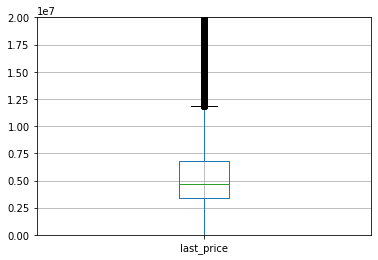

In [46]:
plt.ylim(0, 20000000)
data.boxplot(column='last_price')

По графику заметно, что цены больше 12 миллионов можно посчитать аномальными значениями.

In [47]:
data = data[data['last_price'] < 12000000]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21590 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21590 non-null  int64         
 1   last_price            21590 non-null  float64       
 2   total_area            21590 non-null  float64       
 3   first_day_exposition  21590 non-null  datetime64[ns]
 4   rooms                 21590 non-null  int64         
 5   ceiling_height        21590 non-null  float64       
 6   floors_total          21590 non-null  float64       
 7   living_area           21590 non-null  float64       
 8   floor                 21590 non-null  int64         
 9   is_apartment          21590 non-null  bool          
 10  studio                21590 non-null  bool          
 11  open_plan             21590 non-null  bool          
 12  kitchen_area          21590 non-null  float64       
 13  balcony         

Посмотрим данные по количеству балконов в квартире, они не могут быть дробными, поэтому исправим их.

In [49]:
data['balcony'].unique()

array([2., 0., 1., 5., 4., 3.])

In [50]:
data['balcony'] = data['balcony'].astype('int')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21590 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21590 non-null  int64         
 1   last_price            21590 non-null  float64       
 2   total_area            21590 non-null  float64       
 3   first_day_exposition  21590 non-null  datetime64[ns]
 4   rooms                 21590 non-null  int64         
 5   ceiling_height        21590 non-null  float64       
 6   floors_total          21590 non-null  float64       
 7   living_area           21590 non-null  float64       
 8   floor                 21590 non-null  int64         
 9   is_apartment          21590 non-null  bool          
 10  studio                21590 non-null  bool          
 11  open_plan             21590 non-null  bool          
 12  kitchen_area          21590 non-null  float64       
 13  balcony         

Во время обработки данных были устранены пропуски, появление которых обусловлено скорее всего человеческим фактором. В данных, заполненных автоматически, пропуски заполнить невозможно. Также были устранены аномальные значения, где была перпутана местами разделительная точка или ошибочно введены данные. Удалены явные и неявные дупликаты в названиях населенных пунктов. Изменен тип данных в столбце с первым днем публикации объявления.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец с ценой одного квадратного метра

In [52]:
data['price_sq_meter'] = data['last_price'] / data['total_area']

Также добавим столбцы с днем (0 - понедельник, 1 - вторник и т.д.), месяцем и годом публикации объявления.

In [53]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [54]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [55]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [56]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,price_sq_meter,weekday_exposition,month_exposition,year_exposition
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,B,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,C,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,D,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,NaN,NaN,55.0,A,95065.789474,0,9,2018
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,0.0,NaN,0.0,NaN,155.0,A,99195.710456,3,11,2017


Создадим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»). Для этого создадим функцию, которая возвращает тип этажа по его значению.

In [57]:
def type_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'другой'

In [58]:
data['type_floor'] = data.apply(type_floor, axis=1)

In [59]:
data['type_floor'].unique()

array(['первый', 'другой', 'последний'], dtype=object)

In [60]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_area,price_sq_meter,weekday_exposition,month_exposition,year_exposition,type_floor
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,B,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,C,92785.714286,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,D,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,NaN,55.0,A,95065.789474,0,9,2018,другой
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,NaN,0.0,NaN,155.0,A,99195.710456,3,11,2017,другой


Добавим столбец с расстоянием в км до центра города

In [61]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)

In [62]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,type_area,price_sq_meter,weekday_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,81.0,B,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558.0,C,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,D,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,55.0,A,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,0.0,NaN,155.0,A,99195.710456,3,11,2017,другой,19.0


К полученным данным были посчитаны и добавлены столбцы: цена одного квадратного метра, день публикации объявления (0 - понедельник, 1 - вторник и т.д.), месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние в км до центра города.


### Проведите исследовательский анализ данных

Изучим и опишем, а также построим гистограммы по таким данным как:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

In [64]:
data['total_area'].describe()

count    21590.000000
mean        53.442255
std         19.286379
min         12.000000
25%         39.000000
50%         49.500000
75%         64.000000
max        230.000000
Name: total_area, dtype: float64

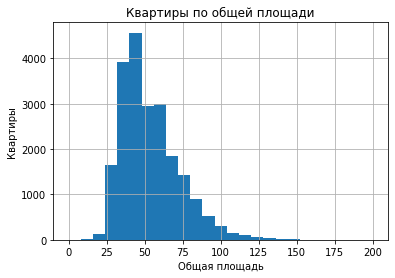

In [65]:
data['total_area'].hist(bins=25, range = (0,200))
plt.title('Квартиры по общей площади')
plt.ylabel('Квартиры')
plt.xlabel('Общая площадь')
plt.show()

Около половины квартир имеют общую площадь меньше 50 кв.метров, меньше всего квартир с площадью больше 95 метров.

In [66]:
data['living_area'].describe()

count    21590.000000
mean        30.627263
std         13.586825
min         10.000000
25%         18.000000
50%         29.600000
75%         39.500000
max        160.000000
Name: living_area, dtype: float64

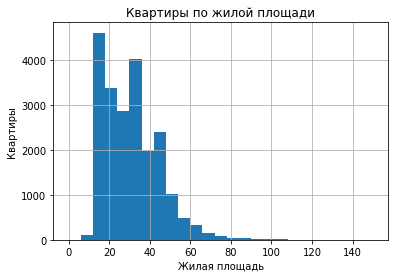

In [67]:
data['living_area'].hist(bins=25, range=(0,150))
plt.title('Квартиры по жилой площади')
plt.ylabel('Квартиры')
plt.xlabel('Жилая площадь')
plt.show()

У большинства квартир жилая площадь до 30 метров, квартиры с жилой площадью больше 55 метров - редкость.

In [68]:
data['kitchen_area'].describe()

count    21590.000000
mean         9.574076
std          3.700643
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

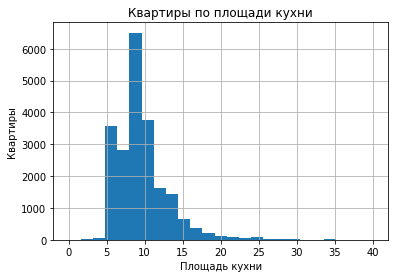

In [69]:
data['kitchen_area'].hist(bins=25, range=(0,40))
plt.title('Квартиры по площади кухни')
plt.ylabel('Квартиры')
plt.xlabel('Площадь кухни')
plt.show()

В большинстве случаев площадь кухни не превышает 10 метров, реже всего встречаются квартиры с площадью кухни больше 16 метров.

In [70]:
data['last_price'].describe()

count    2.159000e+04
mean     4.864718e+06
std      2.247437e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.199900e+07
Name: last_price, dtype: float64

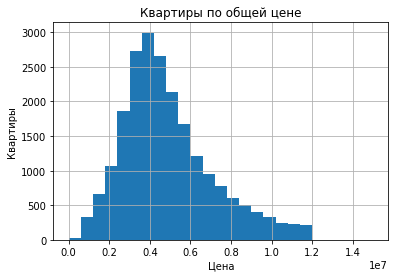

In [71]:
data['last_price'].hist(bins=25, range=(0,15000000))
plt.title('Квартиры по общей цене')
plt.ylabel('Квартиры')
plt.xlabel('Цена')
plt.show()

Чаще всего встречаются квартиры со стоимостью не больше 5 миллионов, намного реже выше 15 миллионов.

In [72]:
data['rooms'].describe()

count    21590.000000
mean         1.934229
std          0.914943
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

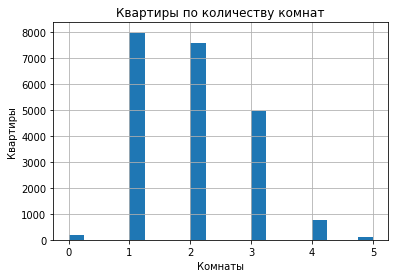

In [73]:
data['rooms'].hist(bins=20, range=(0,5))
plt.title('Квартиры по количеству комнат')
plt.ylabel('Квартиры')
plt.xlabel('Комнаты')
plt.show()

Большая часть квартир имеют от одной до трех комнаты, больше 4 встречаются редко.

In [74]:
data['ceiling_height'].describe()

count    21590.000000
mean         2.674239
std          0.180279
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.700000
Name: ceiling_height, dtype: float64

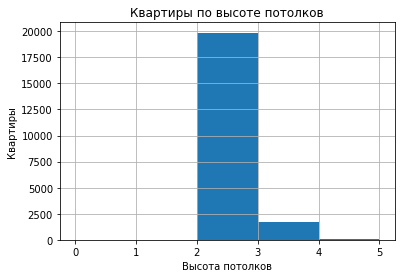

In [75]:
data['ceiling_height'].hist(bins=5, range=(0, 5))
plt.title('Квартиры по высоте потолков')
plt.ylabel('Квартиры')
plt.xlabel('Высота потолков')
plt.show()

В основном у квартир потолки не превышают трех метров.

In [76]:
data['floor'].describe()

count    21590.000000
mean         5.887726
std          4.907830
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

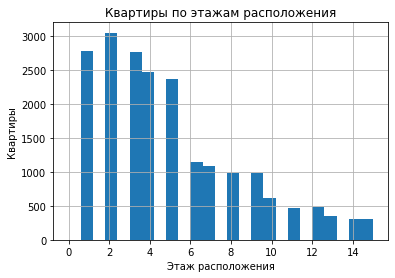

In [77]:
data['floor'].hist(bins=25, range=(0, 15))
plt.title('Квартиры по этажам расположения')
plt.ylabel('Квартиры')
plt.xlabel('Этаж расположения')
plt.show()

Большинство квартир располагаются на этажах ниже 5го.

In [78]:
data['type_floor'].describe()

count      21590
unique         3
top       другой
freq       15817
Name: type_floor, dtype: object

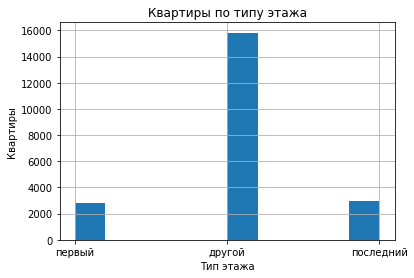

In [79]:
data['type_floor'].hist()
plt.title('Квартиры по типу этажа')
plt.ylabel('Квартиры')
plt.xlabel('Тип этажа')
plt.show()

Квартиры на последнем этаже встречаются чаще, чем на первом, но большая часть располагается на других этажах.

In [80]:
data['floors_total'].describe()

count    21590.000000
mean        10.775173
std          6.626748
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

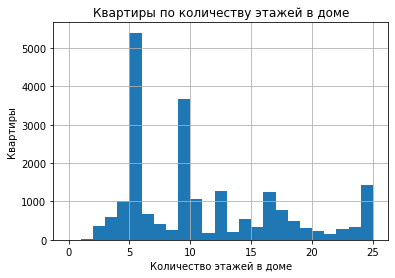

In [81]:
data['floors_total'].hist(bins=25, range=(0,25))
plt.title('Квартиры по количеству этажей в доме')
plt.ylabel('Квартиры')
plt.xlabel('Количество этажей в доме')
plt.show()

Большинство домов имеют 10 этажей.

In [82]:
data['cityCenters_nearest'].describe()

count    16133.000000
mean     14957.201203
std       8558.214950
min        208.000000
25%      10586.000000
50%      13615.000000
75%      16704.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

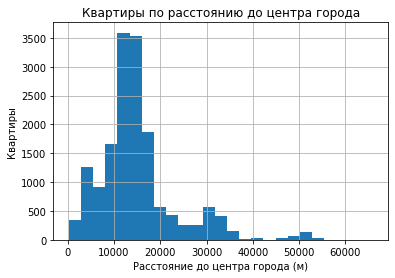

In [83]:
data['cityCenters_nearest'].hist(bins=25)
plt.title('Квартиры по расстоянию до центра города')
plt.ylabel('Квартиры')
plt.xlabel('Расстояние до центра города (м)')
plt.show()

Большинство квартир продаются в радиусе 13ти киллометров от центра Санкт-Петербурга.

In [84]:
data['airports_nearest'].describe()

count    16121.000000
mean     28910.198747
std      12985.272209
min          0.000000
25%      18081.000000
50%      26990.000000
75%      37636.000000
max      84869.000000
Name: airports_nearest, dtype: float64

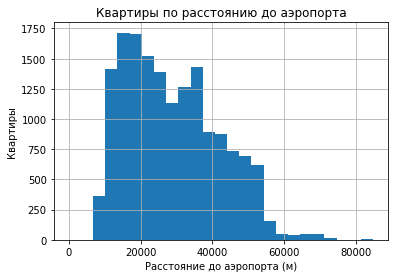

In [85]:
data['airports_nearest'].hist(bins=25)
plt.title('Квартиры по расстоянию до аэропорта')
plt.ylabel('Квартиры')
plt.xlabel('Расстояние до аэропорта (м)')
plt.show()

Чаще всего квартиры располагаются на расстоянии около 30 киллометров от аэропорта.

In [86]:
data['parks_nearest'].describe()

count    6720.000000
mean      489.107887
std       330.530513
min         1.000000
25%       289.000000
50%       455.000000
75%       613.250000
max      3190.000000
Name: parks_nearest, dtype: float64

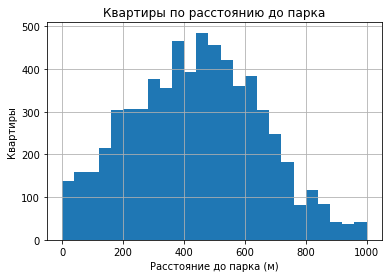

In [87]:
data['parks_nearest'].hist(bins=25, range=(0,1000))
plt.title('Квартиры по расстоянию до парка')
plt.ylabel('Квартиры')
plt.xlabel('Расстояние до парка (м)')
plt.show()

У большинства квартир в радиусе  полукиллометра имеются парки.

In [88]:
data['month_exposition'].describe()

count    21590.000000
mean         6.400648
std          3.488647
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

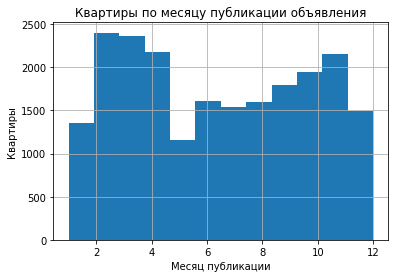

In [89]:
data['month_exposition'].hist(bins=12)
plt.title('Квартиры по месяцу публикации объявления')
plt.ylabel('Квартиры')
plt.xlabel('Месяц публикации')
plt.show()

Чаще всего объявления публикуются с января по апрель, реже всего в мае. 

In [90]:
data['weekday_exposition'].describe()

count    21590.000000
mean         2.574664
std          1.792868
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

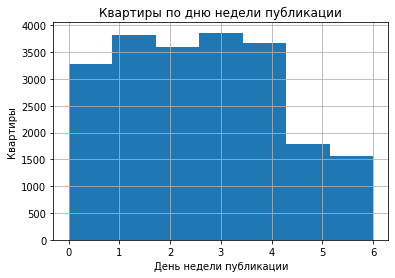

In [91]:
data['weekday_exposition'].hist(bins=7)
plt.title('Квартиры по дню недели публикации')
plt.ylabel('Квартиры')
plt.xlabel('День недели публикации')
plt.show()

Большинство объявлений публикуются в будние дни, реже в выходные

In [92]:
data['days_exposition'].describe()

count    18960.000000
mean       173.617616
std        212.217200
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64

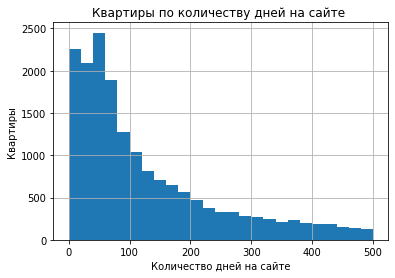

In [93]:
data['days_exposition'].hist(bins=25, range=(0,500))
plt.title('Квартиры по количеству дней на сайте ')
plt.ylabel('Квартиры')
plt.xlabel('Количество дней на сайте')
plt.show()

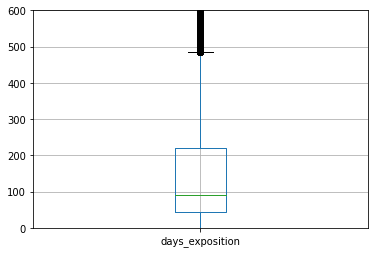

In [94]:
plt.ylim(0,600)
data.boxplot(column='days_exposition')
plt.show()

Большинство квартир остаются на сайте не дольше ста дней. Объявления, висящее дольше 500 дней можно считать необычно долгими, до 44 дней быстрыми.

Создадим таблицу с необходимыми нам данными, чтобы проследить зависимость общей цены от указанных параметров. Также построим матрицу графиков для наглядного представления.<br>

In [95]:
data_changed = data[['last_price', 'total_area', 'kitchen_area', 'living_area']]
data_changed.corr()

,last_price,total_area,kitchen_area,living_area
last_price,1.000000,0.701660,0.490415,0.566591
total_area,0.701660,1.000000,0.450256,0.902476
kitchen_area,0.490415,0.450256,1.000000,0.183566
living_area,0.566591,0.902476,0.183566,1.000000


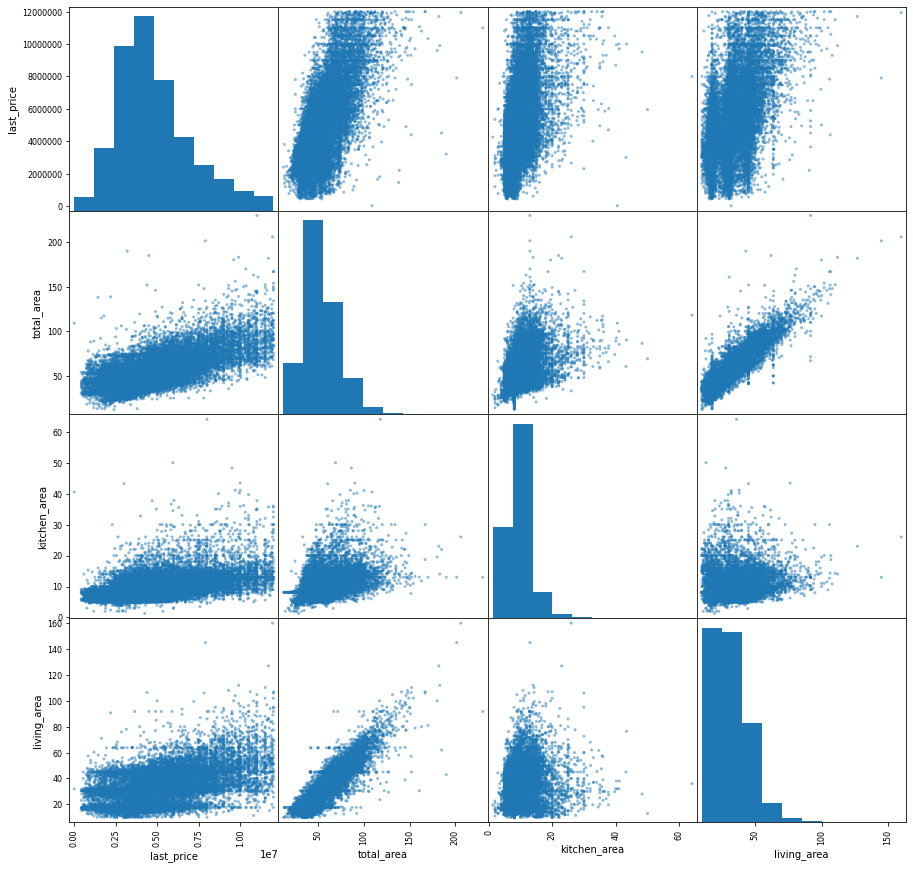

In [96]:
pd.plotting.scatter_matrix(data_changed, figsize=(15,15))
plt.show();

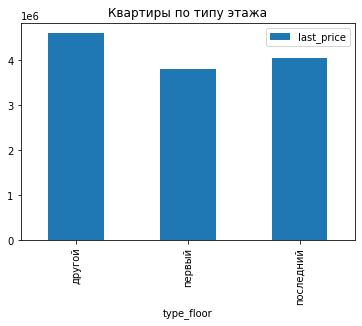

In [97]:
data.pivot_table(index='type_floor', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Квартиры по типу этажа')
plt.show();

По графику видно, что самые дешевые квартиры располагаются на первых этажах, самые дорогие на отличных от последнего и первого.

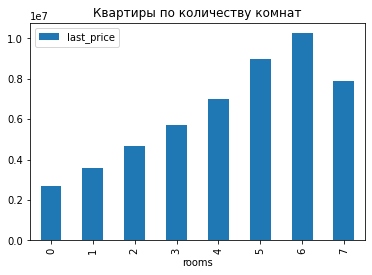

In [98]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Квартиры по количеству комнат')
plt.show();

Заметно, что самые дорогие квартиры имеют 6 комнат, а самые дешевые это студии.

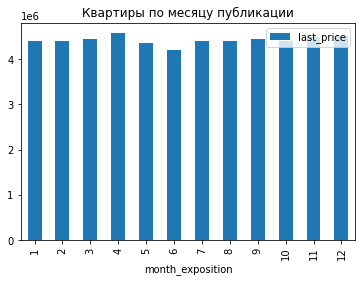

In [99]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Квартиры по месяцу публикации')
plt.show();

Явной зависимости стоимости квартиры от месяца публикации объявления не замечается.

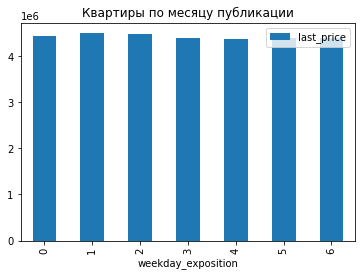

In [112]:
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Квартиры по месяцу публикации')
plt.show();

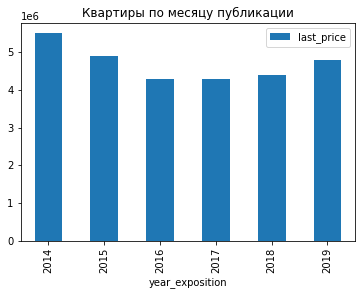

In [110]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Квартиры по месяцу публикации')
plt.show();

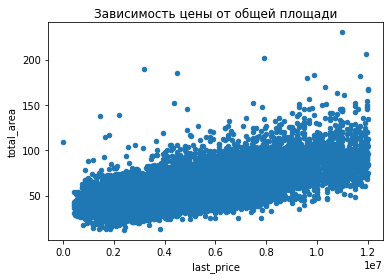

In [100]:
data.plot(x='last_price', y='total_area', kind='scatter')
plt.title('Зависимость цены от общей площади')
plt.show()

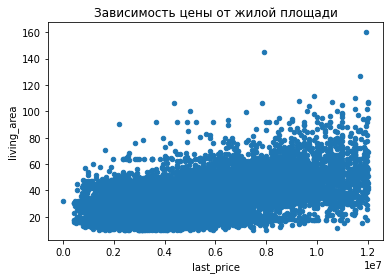

In [101]:
data.plot(x='last_price', y='living_area', kind='scatter')
plt.title('Зависимость цены от жилой площади')
plt.show()

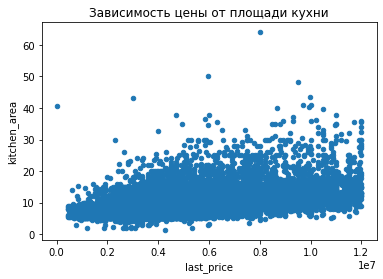

In [102]:
data.plot(x='last_price', y='kitchen_area', kind='scatter')
plt.title('Зависимость цены от площади кухни')
plt.show()

По матрице корреляции и графикам видно, что наибольшая зависимость у цены прослеживается с общей площадью квартиры. Таким образом заметно, что с увеличением площади, увеличивается и цена.

Определим в каких населенных пунктах продается больше всего квартир, возмем первые 10.

In [103]:
data_meters_ids = data.pivot_table(index='locality_name', values='price_sq_meter', aggfunc='count').sort_values(by='price_sq_meter', ascending=False).head(10)
data_meters_ids

,price_sq_meter
locality_name,
Санкт-Петербург,13733
поселок Мурино,555
поселок Шушары,439
Всеволожск,396
Пушкин,336
Колпино,335
поселок Парголово,326
Гатчина,305
деревня Кудрово,298


Больше всего квартир продается в Санкт-Петербурге, меньше всего в Выборге.

Посчитаем среднюю стоимость квадратного метра по выбранным населенным пунктам

In [104]:
(
    data.query('locality_name in @data_meters_ids.index')
    .pivot_table(index='locality_name', values='price_sq_meter', aggfunc='median')
    .sort_values(by='price_sq_meter', ascending=False)
)

,price_sq_meter
locality_name,
Санкт-Петербург,101886.792453
Пушкин,98325.892857
деревня Кудрово,91831.871902
поселок Парголово,91780.224134
поселок Мурино,85714.285714
поселок Шушары,76923.076923
Колпино,74722.222222
Гатчина,67695.961995
Всеволожск,65789.473684


In [105]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,13733,5150000.0
поселок Мурино,555,3400000.0
поселок Шушары,439,3950000.0
Всеволожск,396,3450000.0
Пушкин,336,4990000.0
Колпино,335,3600000.0
поселок Парголово,326,4115000.0
Гатчина,305,3090000.0
деревня Кудрово,298,3785000.0


По таблице видно, что самая большая средняя стоимость квадратного метра в Санкт-Петербурге, а самая маленькая в Выборге.

Проверим есть ли зависимость между расстоянием до центра и общей ценой. 

In [106]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
)

,last_price
cityCenters_nearest_km,
0.0,7600000.0
1.0,8500000.0
2.0,8250000.0
3.0,7370000.0
4.0,7580000.0
5.0,7500000.0
6.0,6900000.0
7.0,6300000.0
8.0,6300000.0


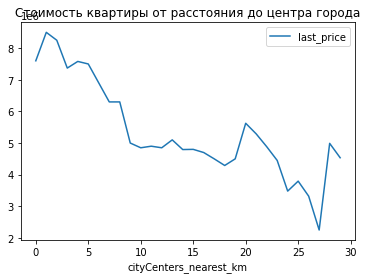

In [107]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
    .plot(title = 'Стоимость квартиры от расстояния до центра города')
);

По графику видно, что не считая некоторых скачков, которые могут быть обусловлены другими факторами, общая динамика цены, показывает, что чем ближе к центру, тем выше цена. 

### Общий вывод

В ходе данного исследования мы очистили полученные данные от пропусков, аномальных значений и дупликатов. Добавили необходимые столбцы: цена одного квадратного метра, день публикации объявления (0 - понедельник, 1 - вторник и т.д.), месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние в км до центра города. Изменили тип данных в столбце со значением дня публикации.<br>Изучили основные параметры, выявили что большинство квартир стоят до 5 миллионов, имеют до трех комнат, потолки не выше трех метров, общая площадь не больше 50 метров, а жилая площадь до 30 метров и располагаются в домах с десятью этажами. Объявления в основном висят на сайте около трех месяцев и выставляются в будние дни.<br> Проверили зависимость общей цены от главных характеристик квартиры, большее влияние имеет общая площадь. Выявили, что в Санкт-Петербурге продается больше всего квартир, а Выборге меньше, средняя цена квадратного метра распределяется точно также. Узнали, что самые дорогие квартиры находятся в центре Санкт-Петербурга.